In [2]:
import numpy as np
from utils.model import truncateModel, getLayerDict
from utils.optimization import getIterateFunction, gradientAscent
import matplotlib.pyplot as plt
import time
from scipy import signal
import IPython.display as ipd
import librosa
from keras.models import load_model, model_from_json

Using TensorFlow backend.


In [5]:
 #We load the trained VGG model
pathToModel = "model/model_VGG16_11_12_2018.h5"

model = model_from_json(open("model/architecture_msdTag_keras2.json").read())
model.load_weights("model/weight_msdTag.hdf5")

layerDict = getLayerDict(model)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 59049, 1)          0         
_________________________________________________________________
convolution1d_1 (Conv1D)     (None, 19683, 128)        512       
_________________________________________________________________
batchnormalization_1 (BatchN (None, 19683, 128)        512       
_________________________________________________________________
activation_1 (Activation)    (None, 19683, 128)        0         
_________________________________________________________________
convolution1d_2 (Conv1D)     (None, 19683, 128)        49280     
_________________________________________________________________
batchnormalization_2 (BatchN (None, 19683, 128)        512       
_________________________________________________________________
activation_2 (Activation)    (None, 19683, 128)        0         
__________

In [8]:
#Corresponds to the size of the training mel spectrogram
    
signalLength = 59049

In [10]:
sampleAu,fs = librosa.load("audio/rock.00001.au")

ipd.Audio(sampleAu[:signalLength], rate=fs)

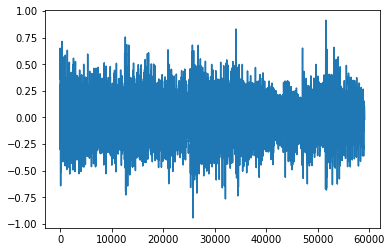

In [9]:
plt.plot(sampleAu[:signalLength])

In [20]:
keptFilters = []
    
inputTensor = model.input
layerName = 'activation_8'

print("Percentage : ")
for filterIndex in range(128):
    print('-{}'.format(filterIndex/128*100))
    startTime = time.time()

    iterate = getIterateFunction(layerDict, layerName, filterIndex, inputTensor)
    
    inputImgData = (np.random.random((1, signalLength, 1)) - 0.5) * 20
    #inputImgData = sampleAu[np.newaxis,:signalLength,np.newaxis].copy()
    
    step = 0.1

    lossValue = gradientAscent(iterate, inputImgData, step)

    print('Current loss value:', lossValue)

    if lossValue > 0.:
        print("kept!")
        keptFilters.append((inputImgData[0,:,0], lossValue))
        if len(keptFilters) == 5:
            break
    endTime = time.time()
    #print('Filter %d processed in %ds' % (filterIndex, endTime - startTime))

Percentage : 
-0.0
failed
Current loss value: 0.0
-0.78125
failed
Current loss value: 0.0
-1.5625
failed
Current loss value: 0.0
-2.34375
Current loss value: 97.3707
kept!
-3.125
Current loss value: 1055.2454
kept!
-3.90625
failed
Current loss value: 0.0
-4.6875
Current loss value: 183.78581
kept!
-5.46875
Current loss value: 156.0293
kept!
-6.25
Current loss value: 200.73572
kept!


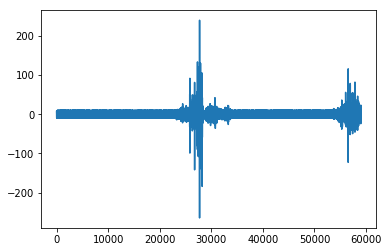

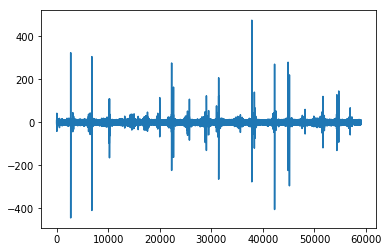

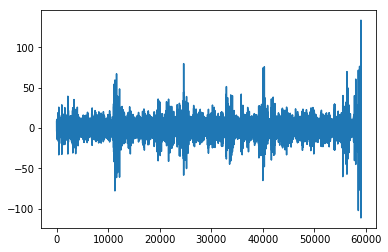

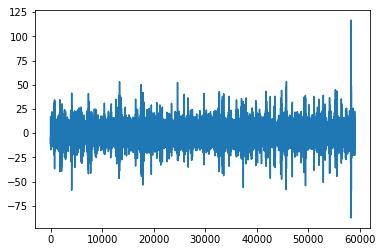

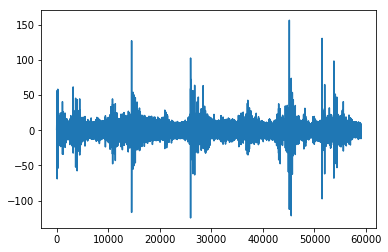

In [23]:
for img in keptFilters:
    plt.figure()
    plt.plot(img[0])

In [22]:
for i in range(len(keptFilters)):
    #rever = signal.istft(keptFilters[i][0], fs=22050, nperseg=198)
    ipd.display(ipd.Audio(keptFilters[i][0], rate=22050))

In [ ]:
model.predict(sampleAu[:signalLength])